In [1]:
import sys
from os import listdir
from os.path import exists

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from tqdm import tqdm

In [2]:
def get_pca_result(test_data_path, hidden_data_path):
    p = pd.read_csv(test_data_path, header=None, sep="\t")

    hidden = listdir(hidden_data_path)
    hidden = [i for i in hidden if "GO" in i]

    X = pd.DataFrame()
    for i in tqdm(hidden):
        X = pd.concat(
            [X, pd.read_table(hidden_data_path + i, sep=" ", header=None)],
            axis=1,
        )

    X.columns = list(range(X.shape[1]))
    X_pca = PCA(n_components=2).fit_transform(X)

    f, ax = plt.subplots()
    points = ax.scatter(X_pca[:, 0], X_pca[:, 1], c=p[2], cmap="coolwarm")

    ax.set_xlabel("PC1", fontsize=15)
    ax.set_ylabel("PC2", fontsize=15)

    f.colorbar(points)

    plt.show()
    plt.savefig("pca_result.png")

100%|██████████| 2086/2086 [26:01<00:00,  1.34it/s]


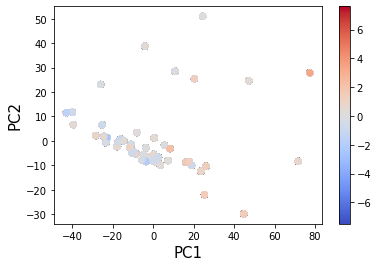

<Figure size 432x288 with 0 Axes>

In [3]:
get_pca_result(
    './DrugCell/data/test_rcell_over50_not_equal.txt', 
    '/export/scratch/inoue019/Hidden_135/'
)